In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_AN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,NaN,0.03760,...,0.56811,-0.51171,NaN,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,NaN,-0.93597,1.00000,-0.04549,...,NaN,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,NaN,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,NaN,-0.01920,0.94590,0.01606,...,NaN,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,NaN,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	0
float64		column 4	0
float64		column 5	18
float64		column 6	0
float64		column 7	18
float64		column 8	0
float64		column 9	37
float64		column 10	0
float64		column 11	73
float64		column 12	0
float64		column 13	55
float64		column 14	0
float64		column 15	73
float64		column 16	0
float64		column 17	18
float64		column 18	0
float64		column 19	73
float64		column 20	0
float64		column 21	73
float64		column 22	0
float64		column 23	19
float64		column 24	0
float64		column 25	18
float64		column 26	0
float64		column 27	19
float64		column 28	0
float64		column 29	36
float64		column 30	0
float64		column 31	0
float64		column 32	0
float64		column 33	54
float64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,351.0,351.000000,351.000000,333.000000,351.000000,333.000000,351.000000,314.000000,351.000000,...,333.000000,351.000000,332.000000,351.000000,315.000000,351.000000,351.000000,351.000000,297.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.613870,0.115889,0.559631,0.119360,0.513936,0.181345,...,0.410087,-0.071187,0.537816,-0.069538,0.382865,-0.027907,0.352514,-0.003794,0.363594,0.014480
std,0.311155,0.0,0.497708,0.441435,0.507928,0.460810,0.483103,0.520750,0.491269,0.483851,...,0.571083,0.508495,0.517910,0.550025,0.575748,0.507974,0.571483,0.513574,0.514161,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.436440,-0.024795,0.250000,-0.054840,0.086785,-0.048075,...,0.000000,-0.332390,0.275285,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.813090,0.022800,0.729900,0.014710,0.668315,0.018290,...,0.561210,-0.015050,0.708530,-0.017690,0.524140,0.000000,0.442770,0.000000,0.428050,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.975450,0.445675,0.943380,0.534195,...,0.901390,0.156765,0.998787,0.153535,0.881220,0.154075,0.857620,0.200120,0.819790,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

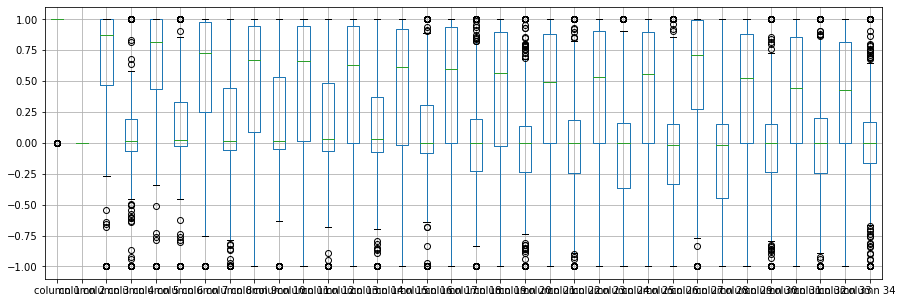

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.641342
column 4     0.044372
column 5     0.613870
column 6     0.115889
column 7     0.559631
column 8     0.119360
column 9     0.513936
column 10    0.181345
column 11    0.462135
column 12    0.155040
column 13    0.385041
column 14    0.093414
column 15    0.339330
column 16    0.071132
column 17    0.387210
column 18   -0.003617
column 19    0.356629
column 20   -0.024025
column 21    0.341178
column 22    0.008296
column 23    0.356083
column 24   -0.057406
column 25    0.410087
column 26   -0.071187
column 27    0.537816
column 28   -0.069538
column 29    0.382865
column 30   -0.027907
column 31    0.352514
column 32   -0.003794
column 33    0.363594
column 34    0.014480
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.302034,-0.006529,0.105906,0.127606,0.185611,0.027079,0.202731,-0.051883,...,-0.000992,0.149789,-0.225044,-0.010725,0.137676,-0.121415,0.167031,-0.100914,0.144619,0.010788
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.302034,NaN,1.000000,0.143365,0.433811,0.025768,0.484782,0.008717,0.444785,0.047916,...,0.306726,-0.073202,0.085214,0.123345,0.386100,0.057890,0.246653,-0.009332,0.313233,0.000584
column 4,-0.006529,NaN,0.143365,1.000000,0.022948,-0.190308,-0.106541,0.255003,-0.341051,0.207697,...,-0.139189,-0.236987,-0.038038,0.000743,-0.051176,0.342301,-0.172276,-0.122788,-0.188309,0.034608
column 5,0.105906,NaN,0.433811,0.022948,1.000000,-0.009204,0.629594,-0.017174,0.350506,-0.002508,...,0.210608,-0.058817,0.131357,0.173792,0.265149,0.053425,0.401615,0.025883,0.413720,-0.136646
column 6,0.127606,NaN,0.025768,-0.190308,-0.009204,1.000000,0.016413,0.274747,-0.128620,0.200080,...,-0.198232,0.041787,-0.166523,-0.068775,-0.066790,-0.158090,-0.100240,0.316802,0.040176,0.185215
column 7,0.185611,NaN,0.484782,-0.106541,0.629594,0.016413,1.000000,-0.141516,0.497495,-0.089586,...,0.314225,0.082424,0.156208,0.141542,0.377876,-0.010303,0.402707,0.037382,0.519217,-0.035755
column 8,0.027079,NaN,0.008717,0.255003,-0.017174,0.274747,-0.141516,1.000000,-0.326178,0.373567,...,-0.215087,-0.133023,-0.254526,0.072373,-0.146170,0.078585,-0.166682,0.152381,-0.232161,0.360610
column 9,0.202731,NaN,0.444785,-0.341051,0.350506,-0.128620,0.497495,-0.326178,1.000000,-0.287694,...,0.396845,0.144424,0.153666,0.163401,0.352845,-0.048878,0.335819,-0.092920,0.396510,-0.087802
column 10,-0.051883,NaN,0.047916,0.207697,-0.002508,0.200080,-0.089586,0.373567,-0.287694,1.000000,...,-0.262935,-0.043680,-0.306500,0.072018,-0.086817,-0.008578,-0.155661,-0.015640,-0.221502,0.098104


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+10,34+10+10,34+10+10+10,34+10+10+10+10,34+10+10+10,34+10+10,34+10,34], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 19.232045219058083
Epoch: 1 , loss: 19.03050440833682
Epoch: 2 , loss: 19.135000773838588
Epoch: 3 , loss: 19.08510362534296
Epoch: 4 , loss: 19.114880743480864
Epoch: 5 , loss: 18.99233681815011
Epoch: 6 , loss: 18.763005302065896
Epoch: 7 , loss: 18.89771475110735
Epoch: 8 , loss: 18.803198224022275
Epoch: 9 , loss: 18.980548813229515
Epoch: 10 , loss: 18.778209504627046
Epoch: 11 , loss: 18.524878274826776
Epoch: 12 , loss: 18.513057890392485
Epoch: 13 , loss: 18.54330689566476
Epoch: 14 , loss: 18.463907877604168
Epoch: 15 , loss: 18.316750117710658
Epoch: 16 , loss: 18.122814950488863
Epoch: 17 , loss: 17.844646817161923
Epoch: 18 , loss: 17.371596154712496
Epoch: 19 , loss: 16.999623389471147
Epoch: 20 , loss: 16.684985433306014
Epoch: 21 , loss: 16.600272042410715
Epoch: 22 , loss: 16.424074172973633
Epoch: 23 , loss: 16.541830289931525
Epoch: 24 , loss: 16.49839819045294
Epoch: 25 , loss: 16.37

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.0
column 2     0.0
column 3     1.0
column 4     1.0
column 5     0.0
column 6     0.0
column 7     0.0
column 8     0.0
column 9    -1.0
column 10   -1.0
column 11    0.0
column 12    0.0
column 13    0.0
column 14    0.0
column 15   -1.0
column 16   -1.0
column 17   -1.0
column 18   -1.0
column 19   -1.0
column 20    1.0
column 21   -1.0
column 22    1.0
column 23    0.0
column 24    0.0
column 25    0.0
column 26    0.0
column 27    1.0
column 28   -1.0
column 29   -1.0
column 30    1.0
column 31   -1.0
column 32    1.0
column 33   -1.0
column 34    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.74031,0.0,...,0.000000,0.0,-0.143543,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0,0,0.0,0.0,0.0,0.0,0.516047,0.0,0.00000,0.0,...,0.501104,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.400469,0.0
2,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
347,0,0,0.0,0.0,0.0,0.0,-0.534790,0.0,0.00000,0.0,...,-0.652464,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.657771,0.0
348,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
349,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

15.137497656466083

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.22111393838879886

In [19]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.33266
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.833980,-0.37708,0.25969,0.03760,...,0.568110,-0.51171,0.267237,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.186410,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,0.407367,-0.93597,1.00000,-0.04549,...,0.297784,-0.26569,-0.204680,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,0.263089,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.000000,-0.12062,0.88965,0.01198,...,0.575280,-0.40220,0.589840,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.560450,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.712160,-1.00000,0.00000,0.00000,...,1.000000,0.90695,0.516130,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.323820,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.921060,-0.23255,0.77152,-0.16399,...,0.032860,-0.65158,0.132900,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.046080,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.843490,-0.05567,0.90441,-0.04622,...,0.953780,-0.04202,0.834790,0.00123,1.00000,0.12815,0.86660,-0.10714,0.905460,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.399590,-0.01920,0.94590,0.01606,...,0.292736,0.01361,0.935220,0.04925,0.93159,0.08168,0.94066,-0.00035,0.257059,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.951770,-0.03431,0.95584,0.02446,...,0.939880,0.03193,0.924890,0.02542,0.92120,0.02242,0.92459,0.00442,0.926970,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.956910,-0.03646,0.85746,0.00110,...,0.910500,-0.02099,0.891470,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.874030,-0.16243


In [21]:
imputations[-1].to_excel("Ionosphere_AN_5(imp).xlsx", index=False, header=False)